In [4]:
from sklearn.preprocessing import (LabelEncoder, LabelBinarizer, RobustScaler)

In [5]:
from sklearn.model_selection import (train_test_split, cross_val_score, StratifiedKFold ,GridSearchCV)

In [6]:
from sklearn.metrics import (accuracy_score, roc_auc_score, classification_report, confusion_matrix)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn.tree import export_graphviz

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings

warnings.filterwarnings('ignore')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 전처리 된 데이터 

In [374]:
df_18 = pd.read_csv('../MACH_data/data_cutoff_age18.csv' )
df_18

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,...,religion,orientation,race,voted,married,familysize,score,v_score,t_score,m_score
0,3.0,6.0,21.0,3.0,7.0,19.0,5.0,20.0,15.0,2.0,...,Christian(othrer),Heterosexual,Black,Yes,Currently married,5,75.0,35.0,33.0,7.0
1,5.0,17.0,4.0,5.0,9.0,8.0,1.0,16.0,6.0,3.0,...,Agnostic,Heterosexual,White,No,Never married,2,91.0,37.0,45.0,9.0
2,2.0,12.0,9.0,4.0,1.0,10.0,2.0,7.0,10.0,1.0,...,Christian(Protestant),Heterosexual,White,Yes,Previously married,2,78.0,37.0,36.0,5.0
3,5.0,13.0,9.0,5.0,7.0,5.0,2.0,19.0,9.0,1.0,...,Christian(Catholic),Homosexual,White,Yes,Never married,2,85.0,35.0,41.0,9.0
4,3.0,11.0,4.0,3.0,10.0,4.0,2.0,17.0,5.0,4.0,...,Atheist,Heterosexual,White,Yes,Never married,2,66.0,28.0,31.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54713,2.0,17.0,10.0,1.0,6.0,14.0,2.0,16.0,25.0,4.0,...,Other,Heterosexual,Asian,No,Currently married,1,59.0,28.0,26.0,5.0
54714,5.0,9.0,6.0,5.0,4.0,4.0,1.0,15.0,7.0,1.0,...,Atheist,Homosexual,White,No,Never married,2,90.0,37.0,43.0,10.0
54715,2.0,17.0,5.0,1.0,18.0,7.0,1.0,9.0,5.0,1.0,...,Agnostic,Heterosexual,White,No,Never married,3,69.0,34.0,27.0,8.0
54716,4.0,15.0,8.0,3.0,9.0,8.0,5.0,17.0,9.0,3.0,...,Buddhist,Heterosexual,Asian,Yes,Never married,4,53.0,25.0,22.0,6.0


In [375]:
lb = LabelBinarizer()
df_18['voted'] = lb.fit_transform(df_18['voted'])

In [376]:
df_18['voted']

0        1
1        0
2        1
3        1
4        1
        ..
54713    0
54714    0
54715    0
54716    1
54717    0
Name: voted, Length: 54718, dtype: int64

In [377]:
df_18_dumi = pd.get_dummies(df_18)

In [378]:
df_18_dumi.tail()

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,...,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,married_Currently married,married_Never married,married_Previously married
54713,2.0,17.0,10.0,1.0,6.0,14.0,2.0,16.0,25.0,4.0,...,0,1,0,0,0,0,0,1,0,0
54714,5.0,9.0,6.0,5.0,4.0,4.0,1.0,15.0,7.0,1.0,...,0,0,0,0,0,0,1,0,1,0
54715,2.0,17.0,5.0,1.0,18.0,7.0,1.0,9.0,5.0,1.0,...,0,0,0,0,0,0,1,0,1,0
54716,4.0,15.0,8.0,3.0,9.0,8.0,5.0,17.0,9.0,3.0,...,0,1,0,0,0,0,0,0,1,0
54717,3.0,12.0,8.0,1.0,10.0,6.0,5.0,13.0,37.0,1.0,...,0,0,0,0,0,1,0,0,1,0


In [379]:
X_18_dumi = df_18_dumi.drop('voted', axis=1)
y_18_dumi = df_18_dumi['voted']

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X_18_dumi, y_18_dumi, test_size=0.2,
                                                   random_state=13)

In [381]:
X_train

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,...,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,married_Currently married,married_Never married,married_Previously married
54695,5.0,11.0,3.0,5.0,18.0,4.0,1.0,14.0,4.0,1.0,...,0,0,0,0,0,0,1,0,1,0
46053,3.0,19.0,8.0,2.0,8.0,6.0,5.0,7.0,5.0,3.0,...,0,0,0,0,0,0,1,0,1,0
28461,5.0,7.0,5.0,4.0,18.0,3.0,5.0,11.0,1.0,4.0,...,0,0,0,0,0,0,1,0,1,0
32791,2.0,17.0,7.0,1.0,12.0,4.0,4.0,14.0,4.0,4.0,...,0,1,0,0,0,0,0,0,1,0
33975,5.0,13.0,6.0,5.0,20.0,5.0,2.0,4.0,6.0,1.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22260,4.0,19.0,6.0,5.0,3.0,19.0,3.0,9.0,10.0,3.0,...,0,1,0,0,0,0,0,0,1,0
33634,5.0,3.0,11.0,5.0,11.0,7.0,5.0,16.0,7.0,3.0,...,0,0,1,0,0,0,0,0,1,0
32842,4.0,7.0,11.0,3.0,12.0,6.0,2.0,13.0,82.0,2.0,...,0,0,0,0,0,0,1,0,1,0
47280,4.0,17.0,5.0,5.0,19.0,3.0,5.0,13.0,13.0,4.0,...,0,0,0,0,0,0,1,0,1,0


# ada, gbc, xgb, lgbm 모델 함수

In [20]:
# ada, gbc, xgb, lgbm

In [56]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [93]:
ada = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

In [413]:
models = [ada, gbc, xgb, lgbm]
model_names = ['Ada', 'GBC', 'XGB', 'LGBM']

In [60]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix)

def get_score(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
   
    return acc, auc, pre, rec, f1

def print_score(y_test, pred, confusion=False, score=False):
    acc, auc, pre, rec, f1 = get_score(y_test, pred)
    con = confusion_matrix(y_test, pred)
    if confusion==True:
        print('confusion matrix')
        print(con)
        print('='*20)
    
    if score==True:
        print('Accuracy: {0:.4f}, AUC: {1:.4f}'.format(acc, auc))
        print('Recall: {0:.4f}, f1_score: {1:.4f}, precision: {2:.4f}'.format(rec, f1, pre))
        

In [414]:
def fit_model(model, X_train, X_test, y_train, y_test):
#     skfold = StratifiedKFold(n_splits=5)
#     cv_scores = []
#     for score in ['accuracy', 'roc_auc']:    
#         score_cv = cross_val_score(model, X_train, y_train, scoring=score, cv=5)
#         cv_scores.append(round(score_cv.mean(), 4))
    model.fit(X_train, y_train)
    y_pre_tr = model.predict(X_train)
    y_pre_test = model.predict(X_test)
    
    return get_score(y_test, y_pre_test)

def models_score_df(models, model_names, X_train, X_test, y_train, y_test):
    cols_names = ['accuracy', 'AUC', 'precision', 'recall', 'f1']
    datas = []
    for model in models:
        datas.append(fit_model(model, X_train, X_test, y_train, y_test))
     
    return pd.DataFrame(datas, columns=cols_names, index=model_names)


In [67]:
model = [ada]

In [70]:
fit_model(ada, X_train, X_test, y_train, y_test)

((0.6504020467836257,
  0.6443137930095595,
  0.6419246002640457,
  0.7595903488977608,
  0.6958180950866591),
 [0.6439, 0.6987])

# straightfied 교차검증

In [72]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)
xgb = XGBClassifier()

In [101]:
# models = [ada, gbc, xgb, lgbm]
# for model in models:
acc = []
pre = []
rec = []
f1 = []
auc = []


for train_idx, test_idx in skfold.split(X_train, y_train):
    X_t, X_te = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_t, y_te = y_train.iloc[train_idx], y_train.iloc[test_idx]
    lgbm.fit(X_t, y_t)
    pred = lgbm.predict(X_te)

    acc.append(accuracy_score(y_te, pred))
    pre.append(precision_score(y_te, pred))
    rec.append(recall_score(y_te, pred))
    f1.append(f1_score(y_te, pred))
    auc.append(roc_auc_score(y_te, pred))
    
    datas = (acc, pre, rec, f1, auc)
    lgbm_cv = pd.DataFrame(datas, index = ["acc", "pre", "rec", "f1", "auc"])

In [112]:
ada_cv["mean"] = ada_cv.mean(axis=1)
ada_cv

,0,1,2,3,4,mean
acc,0.649572,0.638607,0.643632,0.645346,0.642563,0.643944
pre,0.642252,0.632911,0.635851,0.639320,0.638795,0.637826
rec,0.756394,0.747886,0.757425,0.750054,0.740299,0.750412
f1,0.694666,0.685612,0.691334,0.690274,0.685812,0.689539
auc,0.643471,0.632393,0.637162,0.639392,0.636993,0.637882


In [113]:
gbc_cv["mean"] = gbc_cv.mean(axis=1)
gbc_cv

,0,1,2,3,4,mean
acc,0.650257,0.645117,0.641919,0.649343,0.645305,0.646388
pre,0.638720,0.633986,0.633442,0.639335,0.635807,0.636258
rec,0.774382,0.772382,0.760460,0.767396,0.765229,0.767970
f1,0.700039,0.696374,0.691163,0.697537,0.694540,0.695931
auc,0.643168,0.637881,0.635179,0.642631,0.638470,0.639466


In [114]:
xgb_cv["mean"] = xgb_cv.mean(axis=1)
xgb_cv

,0,1,2,3,4,mean
acc,0.642947,0.638835,0.635294,0.638949,0.634453,0.638096
pre,0.644019,0.640792,0.639599,0.642745,0.636469,0.640725
rec,0.721066,0.715803,0.705181,0.708649,0.714286,0.712997
f1,0.680368,0.676224,0.670791,0.674090,0.673136,0.674922
auc,0.638485,0.634459,0.631321,0.634986,0.629903,0.633831


In [115]:
lgbm_cv["mean"] = lgbm_cv.mean(axis=1)
lgbm_cv

,0,1,2,3,4,mean
acc,0.657339,0.652884,0.650714,0.656196,0.648960,0.653219
pre,0.650560,0.646174,0.645137,0.650347,0.644411,0.647326
rec,0.755743,0.754173,0.749187,0.751572,0.744852,0.751105
f1,0.699218,0.696009,0.693280,0.697305,0.691001,0.695362
auc,0.651719,0.647125,0.645115,0.650774,0.643496,0.647646


# 그리드 서치로 베스트 파라그램 찾기

In [116]:
ada = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

In [117]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix)

def get_score(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
   
    return acc, auc, pre, rec, f1

def print_score(y_test, pred, confusion=False, score=False):
    acc, auc, pre, rec, f1 = get_score(y_test, pred)
    con = confusion_matrix(y_test, pred)
    if confusion==True:
        print('confusion matrix')
        print(con)
        print('='*20)
    
    if score==True:
        print('Accuracy: {0:.4f}, AUC: {1:.4f}'.format(acc, auc))
        print('Recall: {0:.4f}, f1_score: {1:.4f}, precision: {2:.4f}'.format(rec, f1, pre))
        

In [37]:
models = [ada]
model_names = ['Ada']

In [38]:
models_score_df(models, model_names, X_train, X_test, y_train, y_test)

,accuracy,AUC,precision,recall,f1
Ada,0.650402,0.644314,0.641925,0.75959,0.695818


In [27]:
models

[AdaBoostClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None),
 LGBMClassifier()]

# 그리드서치 cv

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X_18_dumi, y_18_dumi, test_size=0.2,
                                                   random_state=13)

In [383]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [384]:
params = {"max_depth" : [2, 4, 7, 10]}
XGB = XGBClassifier(max_depth=2, random_state=13)

In [385]:
gridsearch = GridSearchCV(estimator=XGB, param_grid=params, cv =5)

In [386]:
gridsearch.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
import pprint

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(gridsearch.cv_results_)

In [ ]:
gridsearch.best_estimator_

In [ ]:
gridsearch.best_score_

In [ ]:
gridsearch.best_params_

In [ ]:
gridsearch.score(X_test, y_test)

In [ ]:
pred = gridsearch.predict(X_test)

In [50]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix)

def get_score(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
   
    return acc, auc, pre, rec, f1

def print_score(y_test, pred, confusion=False, score=False):
    acc, auc, pre, rec, f1 = get_score(y_test, pred)
    con = confusion_matrix(y_test, pred)
    if confusion==True:
        print('confusion matrix')
        print(con)
        print('='*20)
    
    if score==True:
        print('Accuracy: {0:.4f}, AUC: {1:.4f}'.format(acc, auc))
        print('Recall: {0:.4f}, f1_score: {1:.4f}, precision: {2:.4f}'.format(rec, f1, pre))
        

In [54]:
get_score(y_test, pred)

(0.659265350877193,
 0.6529357238321656,
 0.6478463329452853,
 0.772782503037667,
 0.7048207076703871)

In [ ]:
def fit_model(X_train, X_test, y_train, y_test):
    params = {"max_depth" : [2, 4, 7, 10]}
    XGB = XGBClassifier(max_depth=2, random_state=13)
    gridsearch = GridSearchCV(estimator=XGB, param_grid=params, cv =5)
    gridsearch.fit(X_train, y_train)
    y_pre_tr = gridsearch.predict(X_train)
    y_pre_test = gridsearch.predict(X_test)
    
    return get_score(y_test, y_pre_test)

def models_score_df(models, model_names, X_train, X_test, y_train, y_test):
    cols_names = ['accuracy', 'AUC', 'precision', 'recall', 'f1']
    datas = []
    for model in models:
        datas.append(fit_model(model, X_train, X_test, y_train, y_test))
     
    return pd.DataFrame(datas, columns=cols_names, index=model_names)


# 가중치 마지막

In [387]:
from sklearn.preprocessing import (LabelEncoder, LabelBinarizer, RobustScaler)

In [388]:
df = pd.read_csv('../MACH_data/data_cutoff_age18.csv' )

In [389]:
df= df[['score', 'v_score', 't_score', 'm_score', 'voted']]
df.head()

,score,v_score,t_score,m_score,voted
0,75.0,35.0,33.0,7.0,Yes
1,91.0,37.0,45.0,9.0,No
2,78.0,37.0,36.0,5.0,Yes
3,85.0,35.0,41.0,9.0,Yes
4,66.0,28.0,31.0,7.0,Yes


In [390]:
lb = LabelBinarizer()
df['voted'] = lb.fit_transform(df['voted'])
df

,score,v_score,t_score,m_score,voted
0,75.0,35.0,33.0,7.0,1
1,91.0,37.0,45.0,9.0,0
2,78.0,37.0,36.0,5.0,1
3,85.0,35.0,41.0,9.0,1
4,66.0,28.0,31.0,7.0,1
...,...,...,...,...,...
54713,59.0,28.0,26.0,5.0,0
54714,90.0,37.0,43.0,10.0,0
54715,69.0,34.0,27.0,8.0,0
54716,53.0,25.0,22.0,6.0,1


In [391]:
X = df.drop("voted", axis=1)
Y = df.voted

In [392]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=13)

In [417]:
models_score_df(models, model_names, X_train, X_test, y_train, y_test)

,accuracy,AUC,precision,recall,f1
Ada,0.537646,0.527545,0.546234,0.718799,0.620747
GBC,0.539382,0.527113,0.544832,0.759417,0.634472
XGB,0.529788,0.522482,0.543935,0.660823,0.596708
LGBM,0.527412,0.518493,0.540172,0.687381,0.604950


In [393]:
gbc = GradientBoostingClassifier(random_state=13)

gbc.fit(X_train, y_train)

y_pre_tr=gbc.predict(X_train)
y_pre_test=gbc.predict(X_test)

print('Train ACC : {}, Train AUC : {}'.format(accuracy_score(y_train, y_pre_tr), 
                                              roc_auc_score(y_train, y_pre_tr)))
print('Test ACC : {}, test AUC : {}'.format(accuracy_score(y_test, y_pre_test), 
                                             roc_auc_score(y_test, y_pre_test)))

Train ACC : 0.5475853246219217, Train AUC : 0.5351192744335145
Test ACC : 0.5393823099415205, test AUC : 0.5271133617731958


In [394]:
score_fm = pd.DataFrame(zip(X.columns, dt.feature_importances_), columns=['columns', 'importance'])
score_fm.sort_values('importance', ascending=False)

,columns,importance
2,t_score,0.275429
1,v_score,0.253563
3,m_score,0.182770
0,score,0.131846


In [395]:
X_train

,score,v_score,t_score,m_score
54695,94.0,39.0,45.0,10.0
46053,47.0,23.0,22.0,2.0
28461,71.0,32.0,32.0,7.0
32791,48.0,29.0,13.0,6.0
33975,88.0,42.0,38.0,8.0
...,...,...,...,...
22260,80.0,35.0,35.0,10.0
33634,67.0,33.0,28.0,6.0
32842,77.0,35.0,35.0,7.0
47280,72.0,38.0,28.0,6.0


In [396]:
df

,score,v_score,t_score,m_score,voted
0,75.0,35.0,33.0,7.0,1
1,91.0,37.0,45.0,9.0,0
2,78.0,37.0,36.0,5.0,1
3,85.0,35.0,41.0,9.0,1
4,66.0,28.0,31.0,7.0,1
...,...,...,...,...,...
54713,59.0,28.0,26.0,5.0,0
54714,90.0,37.0,43.0,10.0,0
54715,69.0,34.0,27.0,8.0,0
54716,53.0,25.0,22.0,6.0,1


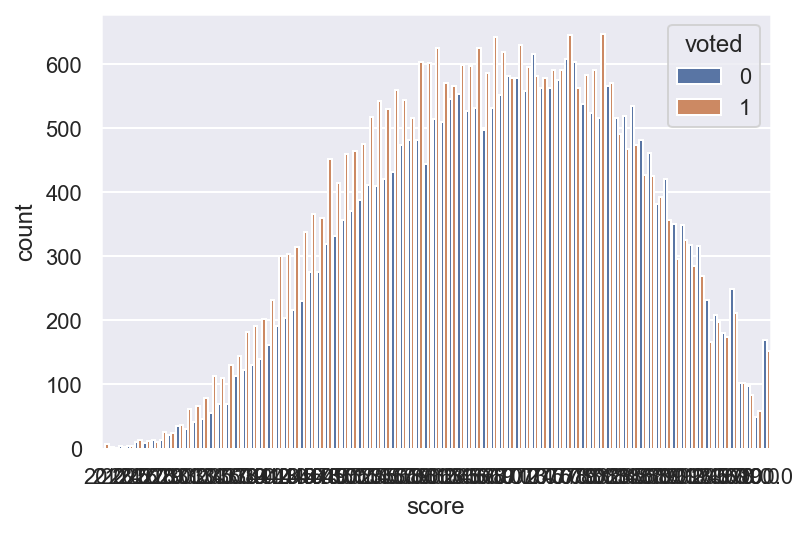

In [397]:
sns.countplot(x=df["score"], hue=df['voted'])

## train test 나눠서 적용

In [398]:
X_train

,score,v_score,t_score,m_score
54695,94.0,39.0,45.0,10.0
46053,47.0,23.0,22.0,2.0
28461,71.0,32.0,32.0,7.0
32791,48.0,29.0,13.0,6.0
33975,88.0,42.0,38.0,8.0
...,...,...,...,...
22260,80.0,35.0,35.0,10.0
33634,67.0,33.0,28.0,6.0
32842,77.0,35.0,35.0,7.0
47280,72.0,38.0,28.0,6.0


In [399]:
df_tr = pd.concat([X_train, y_train], axis=1)
df_tr

,score,v_score,t_score,m_score,voted
54695,94.0,39.0,45.0,10.0,1
46053,47.0,23.0,22.0,2.0,1
28461,71.0,32.0,32.0,7.0,0
32791,48.0,29.0,13.0,6.0,0
33975,88.0,42.0,38.0,8.0,1
...,...,...,...,...,...
22260,80.0,35.0,35.0,10.0,1
33634,67.0,33.0,28.0,6.0,0
32842,77.0,35.0,35.0,7.0,0
47280,72.0,38.0,28.0,6.0,0


In [400]:
df_te = pd.concat([X_test, y_test], axis=1)
df_te

,score,v_score,t_score,m_score,voted
33229,69.0,35.0,27.0,7.0,0
9494,66.0,30.0,30.0,6.0,0
19146,55.0,31.0,18.0,6.0,1
41249,76.0,38.0,32.0,6.0,1
46296,82.0,37.0,38.0,7.0,0
...,...,...,...,...,...
23269,74.0,33.0,36.0,5.0,1
34878,38.0,17.0,15.0,6.0,1
11125,76.0,31.0,39.0,6.0,0
21557,56.0,23.0,26.0,7.0,0


In [401]:
weight_all_tr = df_tr[["voted", "score"]].groupby("score").count()

In [402]:
weight_yes_tr = df_tr[["voted", "score"]].groupby("score").sum()

In [403]:
weight_no_tr = weight_all_tr - weight_yes_tr

In [404]:
weight_all_te = df_te[["voted", "score"]].groupby("score").count()

In [405]:
weight_yes_te = df_te[["voted", "score"]].groupby("score").sum()

In [406]:
weight_no_te = weight_all_te - weight_yes_te

In [407]:
df_weight_tr = (weight_yes_tr - weight_no_tr)/ weight_all_tr

In [408]:
df_weight_te = (weight_yes_te - weight_no_te)/ weight_all_te

In [409]:
df1_tr = pd.merge(left=df_tr, right=df_weight_tr, how="left", right_index=True, left_on="score")
df1_tr

,score,v_score,t_score,m_score,voted_x,voted_y
54695,94.0,39.0,45.0,10.0,1,-0.041009
46053,47.0,23.0,22.0,2.0,1,0.158416
28461,71.0,32.0,32.0,7.0,0,0.027542
32791,48.0,29.0,13.0,6.0,0,0.079208
33975,88.0,42.0,38.0,8.0,1,-0.047154
...,...,...,...,...,...,...
22260,80.0,35.0,35.0,10.0,1,0.101053
33634,67.0,33.0,28.0,6.0,0,0.081420
32842,77.0,35.0,35.0,7.0,0,-0.029508
47280,72.0,38.0,28.0,6.0,0,-0.004202


In [410]:
df1_te = pd.merge(left=df_te, right=df_weight_te, how="left", right_index=True, left_on="score")
df1_te

,score,v_score,t_score,m_score,voted_x,voted_y
33229,69.0,35.0,27.0,7.0,0,-0.061947
9494,66.0,30.0,30.0,6.0,0,0.092683
19146,55.0,31.0,18.0,6.0,1,0.180488
41249,76.0,38.0,32.0,6.0,1,0.044534
46296,82.0,37.0,38.0,7.0,0,-0.053763
...,...,...,...,...,...,...
23269,74.0,33.0,36.0,5.0,1,0.114625
34878,38.0,17.0,15.0,6.0,1,0.117647
11125,76.0,31.0,39.0,6.0,0,0.044534
21557,56.0,23.0,26.0,7.0,0,-0.025381


## train

In [411]:
train_X=df1_tr.drop("voted_x", axis=1)
train_Y=df1_tr.voted_x

In [412]:
test_X=df1_te.drop("voted_x", axis=1)
test_Y=df1_te.voted_x

In [371]:
#train_X

In [416]:
# score (yes-no)/all
models_score_df(models, model_names, train_X, test_X, train_Y, test_Y)

,accuracy,AUC,precision,recall,f1
Ada,0.551444,0.541948,0.557074,0.721750,0.628809
GBC,0.550164,0.540626,0.556076,0.721229,0.627976
XGB,0.534174,0.528554,0.549827,0.634959,0.589335
LGBM,0.547515,0.539416,0.556392,0.692762,0.617133


In [417]:
# only score
models_score_df(models, model_names, X_train, X_test, y_train, y_test)

,accuracy,AUC,precision,recall,f1
Ada,0.537646,0.527545,0.546234,0.718799,0.620747
GBC,0.539382,0.527113,0.544832,0.759417,0.634472
XGB,0.529788,0.522482,0.543935,0.660823,0.596708
LGBM,0.527412,0.518493,0.540172,0.687381,0.604950


In [372]:
#yes
gbc = GradientBoostingClassifier(random_state=13)

gbc.fit(train_X, train_Y)

y_pre_tr=gbc.predict(train_X)
y_pre_test=gbc.predict(test_X)

print('Train ACC : {}, Train AUC : {}'.format(accuracy_score(train_Y, y_pre_tr), 
                                              roc_auc_score(train_Y, y_pre_tr)))
print('Test ACC : {}, test AUC : {}'.format(accuracy_score(test_Y, y_pre_test), 
                                             roc_auc_score(test_Y, y_pre_test)))

Train ACC : 0.5500296979942432, Train AUC : 0.5390135006765864
Test ACC : 0.5501644736842105, test AUC : 0.5406260529605168


In [352]:
#no
gbc = GradientBoostingClassifier(random_state=13)

gbc.fit(train_X, train_Y)

y_pre_tr=gbc.predict(train_X)
y_pre_test=gbc.predict(test_X)

print('Train ACC : {}, Train AUC : {}'.format(accuracy_score(train_Y, y_pre_tr), 
                                              roc_auc_score(train_Y, y_pre_tr)))
print('Test ACC : {}, test AUC : {}'.format(accuracy_score(test_Y, y_pre_test), 
                                             roc_auc_score(test_Y, y_pre_test)))

Train ACC : 0.5500296979942432, Train AUC : 0.5390135006765864
Test ACC : 0.5501644736842105, test AUC : 0.5406260529605168


In [321]:
score_fm = pd.DataFrame(zip(train_X.columns, dt.feature_importances_), columns=['columns', 'importance'])
score_fm.sort_values('importance', ascending=False)

,columns,importance
2,t_score,0.275429
1,v_score,0.253563
3,m_score,0.182770
4,voted_y,0.156392
0,score,0.131846


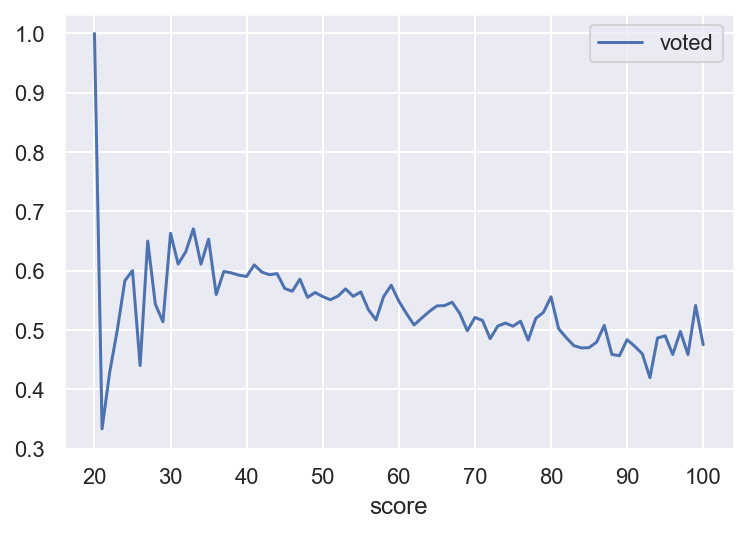

In [169]:
df_s.plot(kind="line")